# Hepatocellular Carcinoma Dataset (HCC dataset)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
import sklearn.linear_model as skl_lm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
columns = ["Gender","Symptoms","Alcohol","HBsAg","HBeAg","HBcAb","HCVAb","Cirrhosis","Endemic","Smoking","Diabetes","Obesity","Hemochro","AHT","CRI","HIV","NASH","Varices","Spleno","PHT","PVT","Metastasis","Hallmark","Age","Grams/day","Packs/year","PS","Encephalopathy","Ascites","INR","AFP","Hemoglobin","MCV","Leucocytes","Platelets","Albumin","Total Bil","ALT","AST","GGT","ALP","TP","Creatinine","Nodules","Major Dim","Dir. Bil","Iron","Sat","Ferritin","Class"]
# nominal count = 23
nominal = ["Gender","Symptoms","Alcohol","HBsAg","HBeAg","HBcAb","HCVAb","Cirrhosis","Endemic","Smoking","Diabetes","Obesity","Hemochro","AHT","CRI","HIV","NASH","Varices","Spleno","PHT","PVT","Metastasis","Hallmark"]
# continuous count = 13
continuous = ["INR","AFP","Hemoglobin","MCV","Leucocytes","Platelets","Albumin","Total Bil","ALP","TP","Creatinine","Major Dim","Dir. Bil"]
# integer count = 9
integer = ["Age","Grams/day","Packs/year","ALT","AST","GGT","Iron","Sat","Ferritin"]
# ordinal count = 4
ordinal = ["PS","Encephalopathy","Ascites","Nodules"]

data = pd.read_csv("hcc-survival/hcc-data.txt", names=columns)
for i,col in enumerate(columns):
    data[col] = pd.to_numeric(data[col], errors='coerce')

## Data Analysis

### Column Information

From data description. Fixed some wrong data types.

name | type | abbreviate | range | missing value(%) | Korean name
--- | --- | --- | --- | --- | ---
Gender | nominal | Gender | (1=Male;0=Female) | 0 | 성별
Symptoms | nominal | Symptoms | (1=Yes;0=No) | 10.91 | 증상
Alcohol | nominal | Alcohol | (1=Yes;0=No) | 0 | 음주 여부
Hepatitis B Surface Antigen | nominal | HBsAg | (1=Yes;0=No) | 10.3 | B형간염표면항원
Hepatitis B e Antigen | nominal | HBeAg | (1=Yes;0=No) | 23.64 | B형간염e항원
Hepatitis B Core Antibody | nominal | HBcAb | (1=Yes;0=No) | 14.55 | B형간염중심항체
Hepatitis C Virus Antibody | nominal | HCVAb | (1=Yes;0=No) | 5.45 | C형간염항체
Cirrhosis | nominal | Cirrhosis | (1=Yes;0=No) | 0 | 간경화
Endemic Countries | nominal | Endemic | (1=Yes;0=No) | 23.64 | 풍토병 발병국 여부
Smoking | nominal | Smoking | (1=Yes;0=No) | 24.85 | 흡연 여부
Diabetes | nominal | Diabetes | (1=Yes;0=No) | 1.82 | 당뇨 여부
Obesity | nominal | Obesity | (1=Yes;0=No) | 6.06 | 비만 여부
Hemochromatosis | nominal | Hemochro | (1=Yes;0=No) | 13.94 | 혈색증
Arterial Hypertension | nominal | AHT | (1=Yes;0=No) | 1.82 | 동맥고혈압
Chronic Renal Insufficiency | nominal | CRI | (1=Yes;0=No) | 1.21 | 만성신부전
Human Immunodeficiency Virus | nominal | HIV | (1=Yes;0=No) | 8.48 | 인간면역결핍바이러스
Nonalcoholic Steatohepatitis | nominal | NASH | (1=Yes;0=No) | 13.33 | 비알콜성지방간
Esophageal Varices | nominal | Varices | (1=Yes;0=No) | 31.52 | 식도정맥류
Splenomegaly | nominal | Spleno | (1=Yes;0=No) | 9.09 | 비장 비대
Portal Hypertension | nominal | PHT | (1=Yes;0=No) | 6.67 | 문맥압항진증
Portal Vein Thrombosis | nominal | PVT | (1=Yes;0=No) | 1.82 | 문맥혈전증
Liver Metastasis | nominal | Metastasis | (1=Yes;0=No) | 2.42 | 간전이
Radiological Hallmark | nominal | Hallmark | (1=Yes;0=No) | 1.21 | 방사선특징
Age at diagnosis | integer | Age | 20-93 | 0 | 진단시 연령
Grams of Alcohol per day | integer | Grams/day | 0-500 | 29.09 | 일간 음주량
Packs of cigarets per year | integer | Packs/year | 0-510 | 32.12 | 연간 흡연량
Performance Status* | ordinal | PS | [0,1,2,3,4,5] | 0 | 전신상태
Encephalopathy degree* | ordinal | Encephalopathy | [1,2,3] | 0.61 | 뇌질환 정도
Ascites degree* | ordinal | Ascites | [1,2,3] | 1.21 | 복수 정도
International Normalised Ratio* | continuous | INR | 0.84-4.82 | 2.42 | 항응고지표
Alpha-Fetoprotein (ng/mL) | continuous | AFP | 1.2-1810346 | 4.85 | 알파태아단백
Haemoglobin (g/dL) | continuous | Hemoglobin | 5-18.7 | 1.82 | 헤모글로빈
Mean Corpuscular Volume (fl) | continuous | MCV | 69.5-119.6 | 1.82 | 평균적혈구용적
Leukocytes(G/L) | continuous | Leucocytes | 2.2-13000 | 1.82  | 백혈구
Platelets (G/L) | continuous | Platelets | 1.71-459000 | 1.82 | 혈소판
Albumin (mg/dL) | continuous | Albumin | 1.9-4.9 | 3.64 | 알부민
Total Bilirubin(mg/dL) | continuous | Total Bil | 0.3-40.5 | 3.03 | 빌리루빈총량
Alanine transaminase (U/L) | integer | ALT | 11-420 | 2.42 | 알라닌아미노전이효소
Aspartate transaminase (U/L) | integer | AST | 17-553 | 1.82 | 아스파르트산염아미노전이효소
Gamma glutamyl transferase (U/L) | integer | GGT | 23-1575 | 1.82 | 감마글루타밀전이효소
Alkaline phosphatase (U/L) | continuous | ALP | 1.28-980 | 1.82 | 알칼리성인산분해효소
Total Proteins (g/dL) | continuous | TP | 3.9-102 | 6.67 | 단백질 총량
Creatinine (mg/dL) | continuous | Creatinine | 0.2-7.6 | 4.24 | 크레아티닌
Number of Nodules | ordinal | Nodules | [0,1,2,3,4,5] | 1.21 | 간결절 수
Major dimension of nodule (cm) | continuous | Major Dim | 1.5-22 | 12.12 | 간결절 크기
Direct Bilirubin (mg/dL) | continuous | Dir. Bil | 0.1-29.3 | 26.67 | 직접빌리루빈
Iron (mcg/dL) | integer | Iron | 0-244 | 47.88 | 철
Oxygen Saturation (%) | integer | Sat | 0-126 | 48.48 | 산소포화도
Ferritin (ng/mL) | integer | Ferritin | 0-2230 | 48.48 | 페리틴(저장철)
Class Attribute | nominal | Class | (1=lives;0=dies) | 0 | 생존여부

* Additional Info:   
PS:[0=Active;1=Restricted;2=Ambulatory;3=Selfcare;4=Disabled;5=Dead]   
Encephalopathy degree: [1=None;2=Grade I/II; 3=Grade III/IV]   
Ascites degree: [1=None;2=Mild;3=Moderate to Severe]

## Missing Data

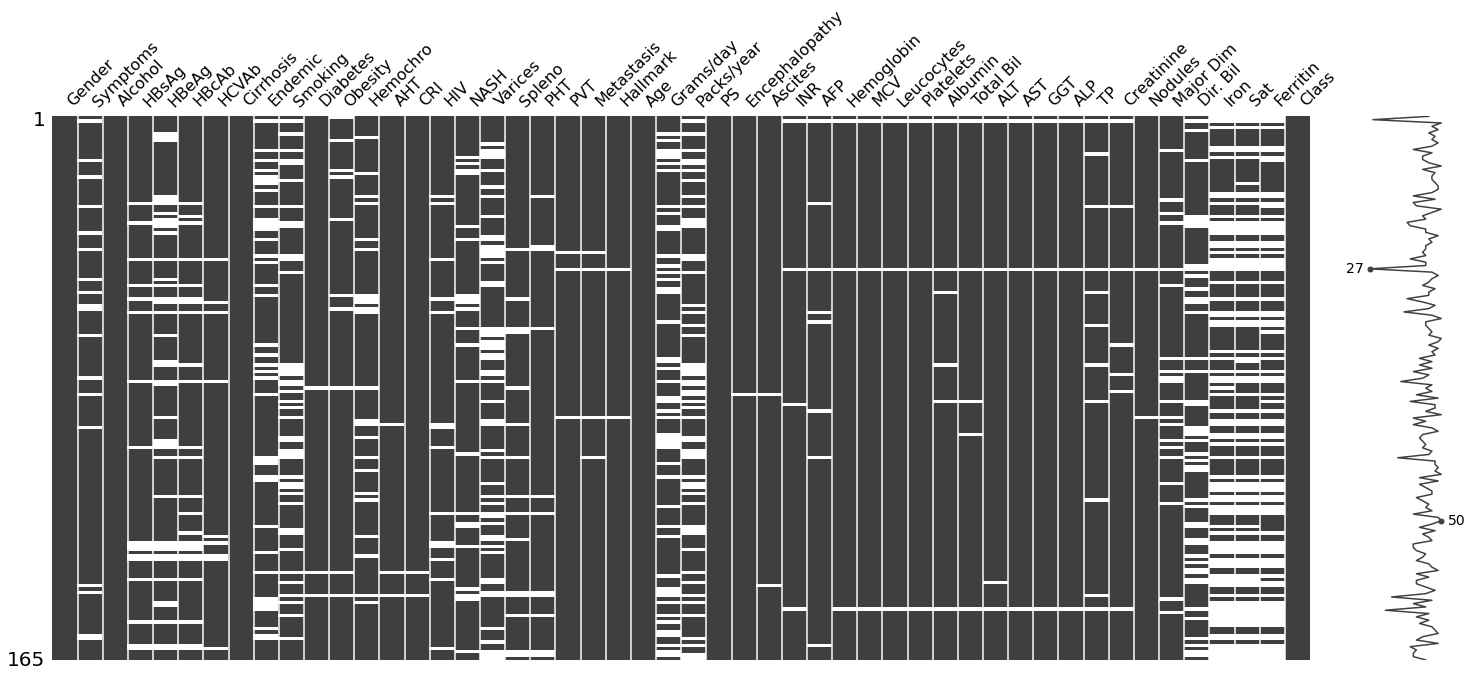

In [4]:
msno.matrix(data)

Iron, Sat, and Ferritin have similar missing patterns and also have high missing rate which is over 40%.   
Thus, dropping those columns can be a reasonable choice to improve our performance.   
Also, we can choose removing rows that has a lot of common missing columns.   
By observation, we can find the rows without Hemoglobin value also have many other missing columns, which means that no blood test was conducted for those patients.   
For other missing values, since we have little amount of data, replace into some other values.

In [5]:
missing_over40 = ["Iron","Sat","Ferritin"]
missing_common = ["Hemoglobin"]

#### Remove Missing Rows
Remove rows that have many common missing columns.

In [6]:
data.dropna(subset=missing_common , inplace=True)

## Train/Test split
Since there's no explicit test data, split training and test data from original dataset first.

In [7]:
x_train_org, x_test_org, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.3, random_state=2)
x_train = x_train_org.copy()
x_test= x_test_org.copy()

## Analysis

posx and posy should be finite values
posx and posy should be finite values


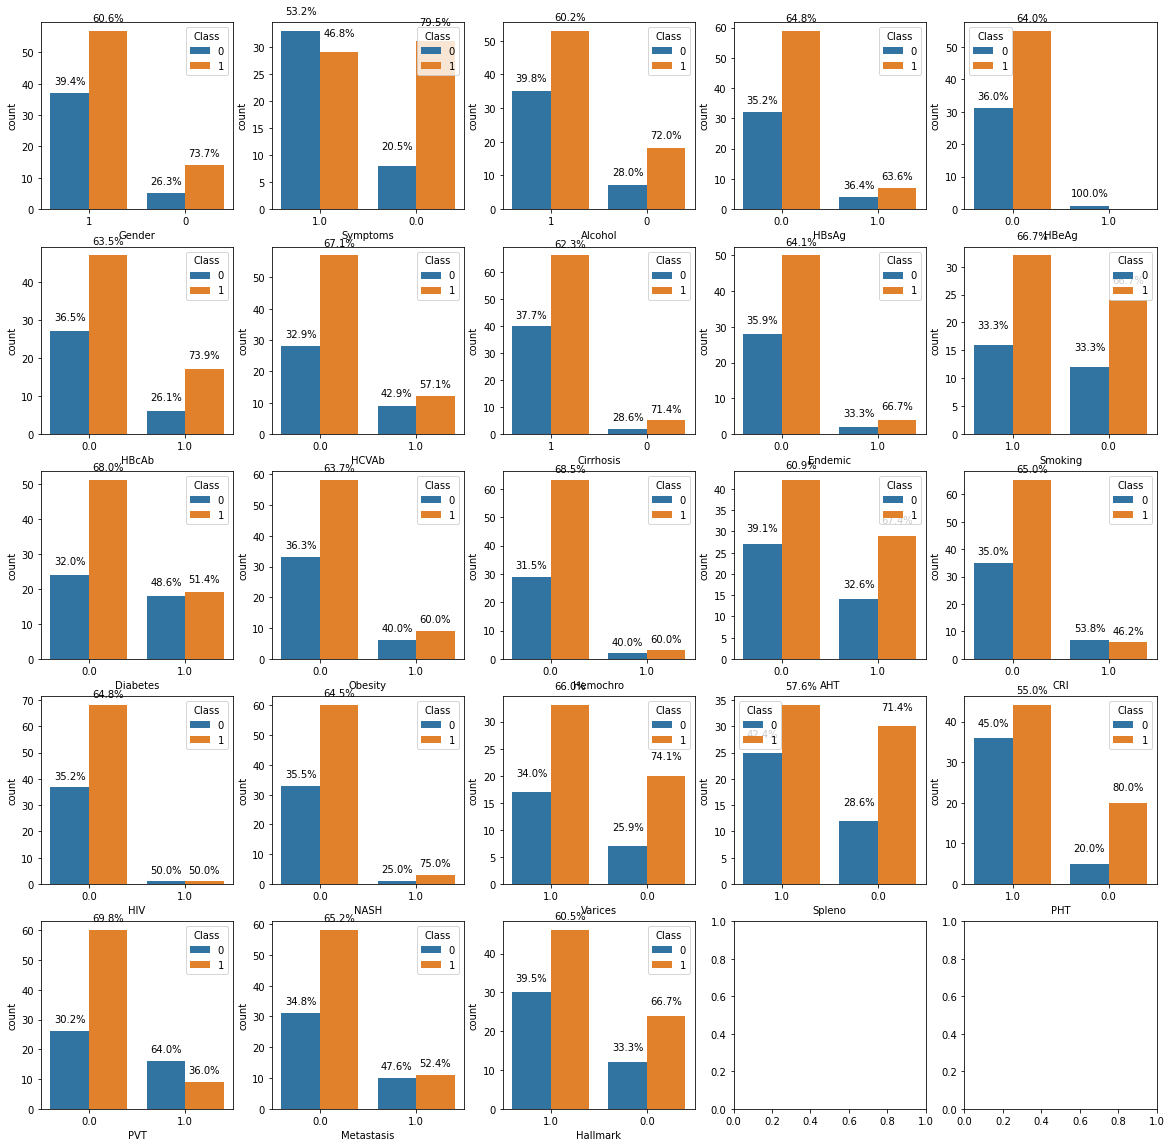

In [8]:
#barplots on nominal columns
figure, axs = plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(20,20)

for i,col in enumerate(nominal):
    ax = axs[i//5][i%5]
    totals = x_train[col].value_counts()
    sns.countplot(x=col, hue=y_train, data=x_train, order=totals.index, ax=ax)
    
    for p,t in zip(ax.patches, totals.values.tolist()*2):
        h = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,h+3, '{0:.1%}'.format(h/t), ha="center")

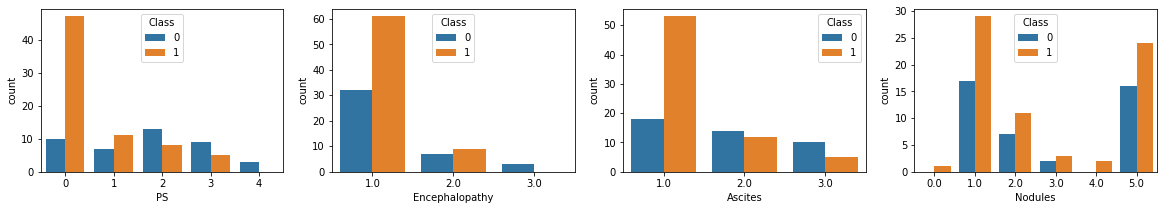

In [9]:
#barplots on ordinal columns
figure, axs = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,3)

for i,col in enumerate(ordinal):
    sns.countplot(x=col, hue=y_train, data=x_train, ax=axs[i])

All ordinal features seem to have its own semantic.

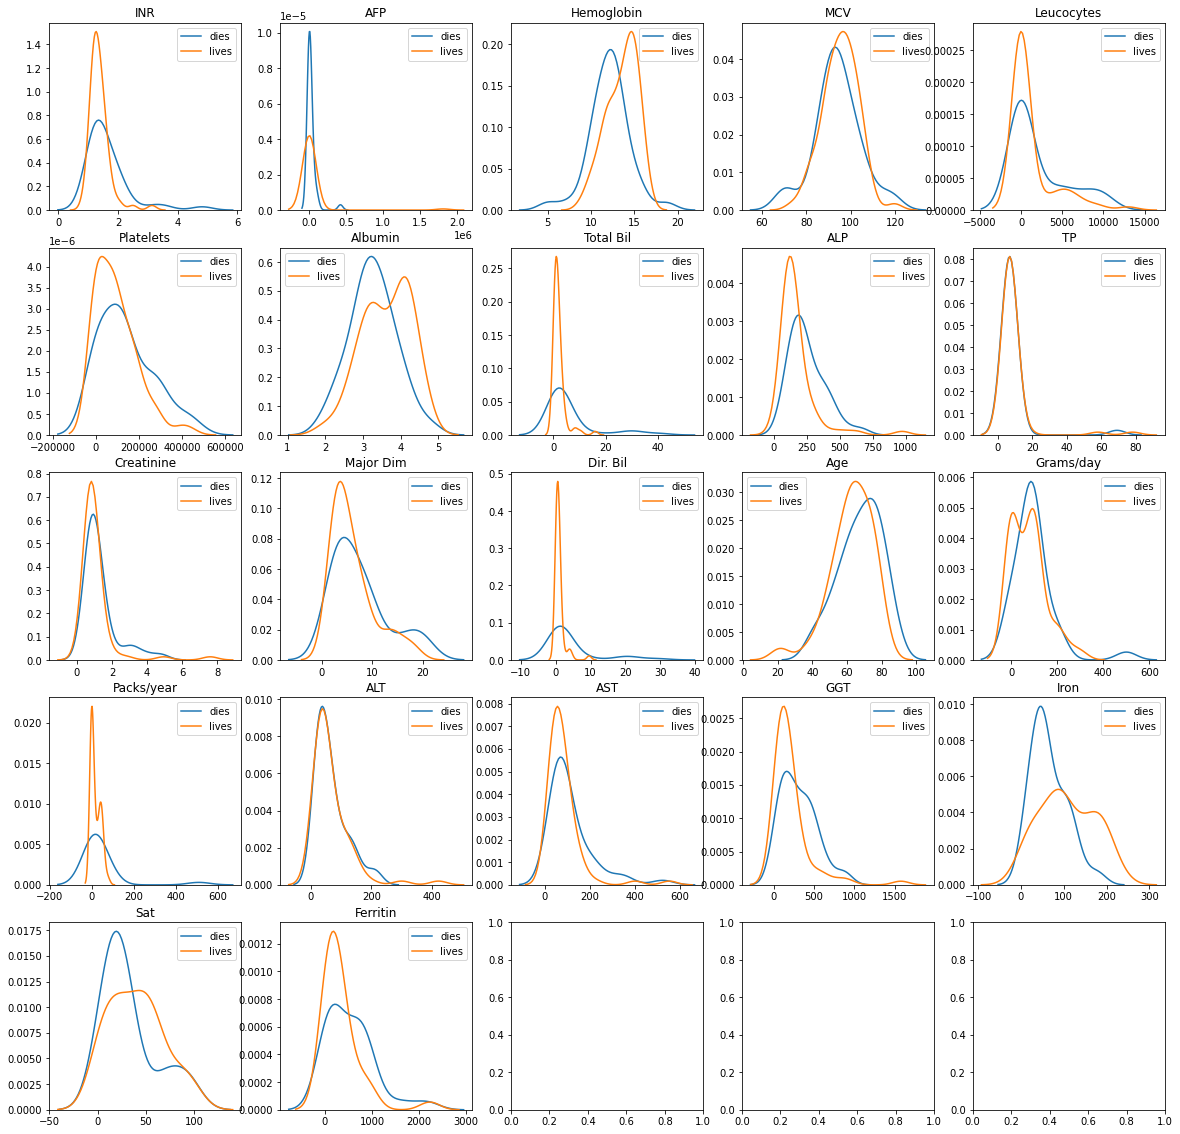

In [10]:
# kernel density plots on continuous columns
figure, axs = plt.subplots(nrows=5, ncols=5)
figure.set_size_inches(20,20)

for i,col in enumerate(continuous+integer):
    axs[i//5][i%5].title.set_text(col)
    sns.kdeplot(x_train[y_train == 0][col], ax=axs[i//5][i%5], label="dies")
    sns.kdeplot(x_train[y_train == 1][col], ax=axs[i//5][i%5], label="lives")

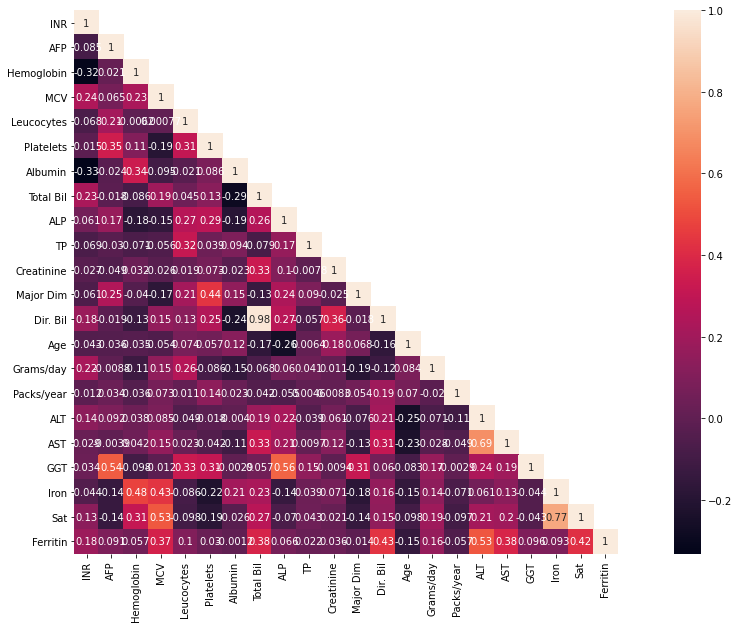

In [11]:
# correlations btw continuous columns
corrMat = pd.concat([x_train[continuous],x_train[integer]], axis=1).astype(float).corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMat,mask=mask,square=True,annot=True)

High correlation on Dir.Bil and Total Bil.

## Feature Engineering

#### Replace Missing Values

In [12]:
# Single Value
x_train.fillna(-1, inplace=True)
x_test.fillna(-1, inplace=True)

In [13]:
# Median

# x_train.fillna(x_train.median(), inplace=True)
# x_test.fillna(x_test.median(), inplace=True)

In [14]:
# Mean

# x_train.fillna(x_train.mean(), inplace=True)
# x_test.fillna(x_test.mean(), inplace=True)

In [15]:
# Most Frequent Value

# x_train.fillna(x_train.mode().iloc[0], inplace=True)
# x_test.fillna(x_test.mode().iloc[0], inplace=True)

In [16]:
#KNN

# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=10)
# x_train = imputer.fit_transform(x_train)
# x_test = imputer.fit_transform(x_test)

### Feature extraction
Remove columns according to the analysis above.

In [17]:
x_train.drop(labels='Dir. Bil', axis=1, inplace=True, errors='ignore')
x_test.drop(labels='Dir. Bil', axis=1, inplace=True, errors='ignore')

### Feature Selection

We can select columns above easily by univariate selection using ANOVA and observing feature importance on simple randomforest model.   

##### Univariate Selection

In [18]:
def select(p, x_train, x_test, y_trian, y_test):
    x_train_selected = x_train.copy()
    x_test_selected= x_test.copy()
#     x_train_selected.fillna(-1, inplace=True)
#     x_test_selected.fillna(-1, inplace=True)
    
    select = SelectPercentile(percentile = p)
    select.fit(x_train_selected, y_train)
    x_train_selected = select.transform(x_train_selected)
    x_test_selected = select.transform(x_test_selected)

    lr_selected = skl_lm.LogisticRegression()
    lr_selected.fit(x_train_selected, y_train)
    return (lr_selected.score(x_test_selected, y_test),select.get_support())

In [19]:
percent, max_val, s = 0,0,0
for i in range(1,100,1):
    val,s_tmp = select(i, x_train, x_test, y_train, y_test)
    if max_val<val:
        max_val = val
        percent = i
        s = s_tmp
print(percent, max_val)

47 0.7959183673469388


In [20]:
# x_train = x_train.loc[:,s]
# x_test = x_test.loc[:,s]
x_train_ANOVA = x_train.loc[:,s]
x_test_ANOVA = x_test.loc[:,s]

In [21]:
# x_train.columns

##### Feature Importance

In [22]:
rf_tmp = RandomForestClassifier()
rf_tmp.fit(x_train, y_train)

def plot_feature_importances_cancer(model, data):
    n_features = data.shape[1]
    plt.figure(figsize = (20,15))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("attr importances")
    plt.ylabel("attr")
    plt.ylim(-1, n_features)
    plt.show()

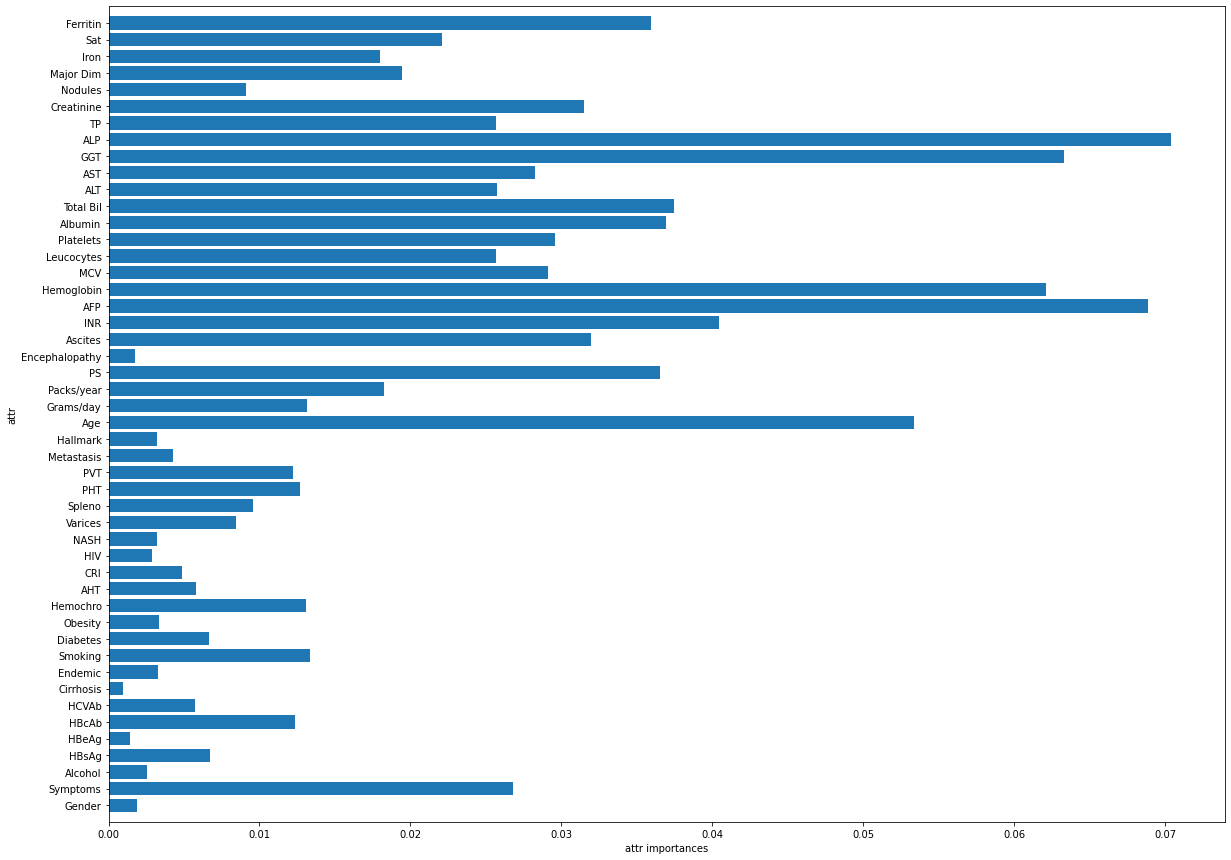

In [23]:
not_important = x_train.columns[rf_tmp.feature_importances_<0.005]
plot_feature_importances_cancer(rf_tmp, x_train)

In [24]:
not_important

Index(['Gender', 'Alcohol', 'HBeAg', 'Cirrhosis', 'Endemic', 'Obesity', 'CRI',
       'HIV', 'NASH', 'Metastasis', 'Hallmark', 'Encephalopathy'],
      dtype='object')

In [25]:
x_train.drop(not_important, inplace=True, errors='ignore')
x_test.drop(not_important, inplace=True, errors='ignore')

## Result
### Before Parameter Tuning

In [26]:
x_train_org.fillna(-1, inplace=True)
x_test_org.fillna(-1, inplace=True)

In [27]:
#before tuning
lr_org=skl_lm.LogisticRegression()
lr = skl_lm.LogisticRegression()
lr_org.fit(x_train_org, y_train)
lr.fit(x_train, y_train)
print(lr_org.score(x_test_org, y_test),lr.score(x_test,y_test))

0.6938775510204082 0.7346938775510204


In [28]:
rf_org = RandomForestClassifier()
rf = RandomForestClassifier()
rf_org.fit(x_train_org, y_train)
rf.fit(x_train, y_train)
print(rf_org.score(x_test_org, y_test),rf.score(x_test,y_test))

0.6326530612244898 0.5714285714285714


### Parameter Tuning

In [29]:
def LR(i,x_train, y_train, x_test, y_test):
    lr=skl_lm.LogisticRegression(C=i,tol=1e-5,solver='lbfgs',max_iter=500)
    lr.fit(x_train, y_train)
    return lr.score(x_test, y_test)

In [30]:
def tune(x_train, y_train, x_test, y_test):
    scr, val_c = 0,0
    for i in range(1,100,1):
        tmp = LR(i/10,x_train, y_train, x_test, y_test)
        if scr < tmp:
            scr = tmp
            val_c = i
    print(scr, val_c/10)
    return val_c

In [31]:
val_c_ANOVA = tune(x_train_ANOVA, y_train, x_test_ANOVA, y_test)

0.7346938775510204 0.2


In [32]:
val_c = tune(x_train, y_train, x_test, y_test)

0.8163265306122449 6.2


### ROC

In [33]:
#predict probability
def printROC(model, model_org, x_test_org, x_test, y_test):
    y_predicted_org = model_org.predict_proba(x_test_org)[:,1]
    y_predicted = model.predict_proba(x_test)[:,1]

    #FP, TP
    FP_org, TP_org, thresholds_org= roc_curve(y_test,y_predicted_org)
    auc_org = roc_auc_score(y_test, y_predicted_org)
    FP, TP, thresholds= roc_curve(y_test,y_predicted)
    auc = roc_auc_score(y_test, y_predicted)

    #print
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(FP_org, TP_org, label='Original')
    plt.plot(FP, TP, label='After Feature Engineering')
    plt.xlabel('False-positive')
    plt.ylabel('True-positive')
    plt.title('ROC curve (original = %f, after = %f)' % (auc_org,auc))
    plt.legend(loc='best')
    plt.show()

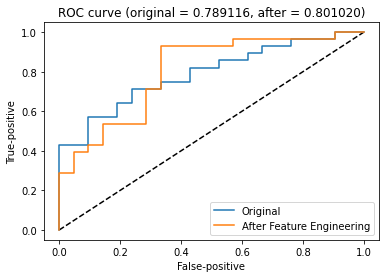

In [34]:
lr=skl_lm.LogisticRegression(C=val_c_ANOVA/10,tol=1e-5,solver='lbfgs',max_iter=500)
lr.fit(x_train, y_train)
printROC(lr, lr_org, x_test_org, x_test, y_test)

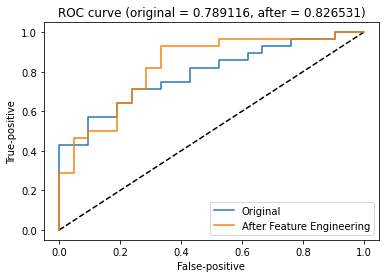

In [35]:
lr=skl_lm.LogisticRegression(C=val_c/10,tol=1e-5,solver='lbfgs',max_iter=500)
lr.fit(x_train, y_train)
printROC(lr, lr_org, x_test_org, x_test, y_test)

In [36]:
print(lr_org.score(x_test_org, y_test), lr.score(x_test, y_test))

0.6938775510204082 0.8163265306122449
